In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
year = []
for i in range(1998, 2015):
    year.append(i)

col_names_ingredient = ["recipe_id", "ingredient"]

In [3]:
# ingredientファイルを読み込む
ingredient = pd.DataFrame(columns=col_names_ingredient)

for i in year:
    ingredient_temp = pd.read_csv(f"/Users/tamuramasayuki/Desktop/3S/基礎プロジェクトB/programming/dataset/ingredient/ingredient{i}.csv",
                              names=col_names_ingredient, usecols=[0, 1])

    ingredient = pd.concat([ingredient, ingredient_temp])

In [4]:
vc = ingredient['ingredient'].value_counts()

In [5]:
ingredient_oliveoil = ingredient[ingredient["ingredient"].isin(["オリーブオイル", "オリーブ油", "おりーぶおいる"])]

In [6]:
oliveoil_id = ingredient_oliveoil.drop(["ingredient"], axis=1)

In [7]:
df_i = pd.merge(ingredient, oliveoil_id, on="recipe_id", how="right")

In [8]:
df_i = df_i[~df_i["ingredient"].isin(["オリーブオイル", "オリーブ油", "おりーぶおいる"])]

In [9]:
vc_i = df_i["ingredient"].value_counts()

In [24]:
vc

砂糖                   295294
塩                    279845
水                    230650
卵                    216180
醤油                   158829
                      ...  
イカ（ソーメン）                  1
パクチー/香菜/コリアンダー            1
玄米粉レシピID :1459661         1
セロリの葉（切らないでそのまま）          1
小えび（あれば）                  1
Name: ingredient, Length: 1394107, dtype: int64

In [25]:
vc_i

塩                      38624
にんにく                   26102
玉ねぎ                    20942
水                      13726
塩コショウ                  12987
                       ...  
Ａ　アスパラガス                   1
～中鍋～（スープ）                  1
○しょうがみじん切り                 1
インゲン（冷食）                   1
クレイジーソルト（なければお好みの塩）        1
Name: ingredient, Length: 134606, dtype: int64

In [26]:
olive = vc_i.index[:500]

In [27]:
olive

Index(['塩', 'にんにく', '玉ねぎ', '水', '塩コショウ', 'パスタ', 'トマト', 'ニンニク', 'ベーコン', 'バター',
       ...
       '青ネギ', '☆玉ねぎ', 'カッペリーニ', '春巻きの皮', '三温糖', 'にんにく（すりおろし）', 'ちくわ',
       'ミックスチーズ', '●牛乳', 'クスクス'],
      dtype='object', length=500)

In [33]:
total = vc.index[:1000]

In [34]:
total

Index(['砂糖', '塩', '水', '卵', '醤油', '牛乳', '玉ねぎ', 'バター', '酒', 'マヨネーズ',
       ...
       '甜菜糖', 'ほうれんそう', '★カレー粉', '大豆', 'スナップえんどう', 'メイプルシロップ', '牛肉薄切り',
       'ねぎ(みじん切り)', '油(炒め用)', '粗挽きコショウ'],
      dtype='object', length=1000)

In [35]:
box = []
for i in range(len(total)):
    word = total[i]
    for j in range(len(olive)):
        if olive[j] == word:
            box.append(word)

In [36]:
len(box)

429

In [38]:
comb = olive.drop(box)

In [40]:
import csv

In [41]:
with open("combination.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(comb)

In [42]:
with open("combination.csv", "r") as f:
    text = f.read()

In [43]:
text

'ワ,イ,ン,ビ,ネ,ガ,ー\nア,ン,チ,ョ,ビ,ペ,ー,ス,ト\nア,ン,チ,ョ,ビ,フ,ィ,レ\nオ,リ,ー,ブ\nト,マ,ト,ホ,ー,ル,缶\nサ,フ,ラ,ン\nド,ラ,イ,ト,マ,ト\nガ,ー,リ,ッ,ク\nブ,ラ,ッ,ク,オ,リ,ー,ブ\nト,マ,ト,ペ,ー,ス,ト\nバ,ジ,ル,ソ,ー,ス\nケ,ッ,パ,ー\n塩,・,ブ,ラ,ッ,ク,ペ,ッ,パ,ー\nト,マ,ト,缶,(,カ,ッ,ト,)\nに,ん,に,く,ス,ラ,イ,ス\nニ,ン,ニ,ク,（,み,じ,ん,切,り,）\nバ,ジ,ル,ペ,ー,ス,ト\nパ,ス,タ,の,ゆ,で,汁\nク,ミ,ン,パ,ウ,ダ,ー\nニ,ン,ニ,ク,み,じ,ん,切,り\nロ,ー,リ,エ,の,葉\n完,熟,ト,マ,ト\n茹,で,汁\n鷹,の,爪,(,輪,切,り,)\nに,ん,に,く,の,み,じ,ん,切,り\nパ,セ,リ,(,み,じ,ん,切,り,)\nバ,ル,サ,ミ,コ\n生,バ,ジ,ル\nマ,リ,ネ,液\nた,か,の,つ,め\n鷹,の,つ,め\nフ,レ,ッ,シ,ュ,バ,ジ,ル\nブ,ロ,ッ,ク,ベ,ー,コ,ン\nロ,ー,レ,ル\nカ,ッ,ト,ト,マ,ト\nパ,ス,タ,麺\nパ,プ,リ,カ,(,赤,)\nパ,プ,リ,カ,パ,ウ,ダ,ー\nに,ん,に,く,（,ス,ラ,イ,ス,）\n黄,パ,プ,リ,カ\n黒,オ,リ,ー,ブ\nパ,ル,ミ,ジ,ャ,ー,ノ\nバ,ジ,ル,(,乾,燥,)\nパ,セ,リ,（,み,じ,ん,切,り,）\nト,マ,ト,の,水,煮,缶\n粗,挽,き,こ,し,ょ,う\nゆ,で,汁\nパ,セ,リ,み,じ,ん,切,り\nコ,ン,ソ,メ,ス,ー,プ\nケ,イ,パ,ー\n塩,・,黒,胡,椒\nパ,ル,メ,ザ,ン,チ,ー,ズ,(,粉,チ,ー,ズ,)\nピ,ザ,生,地\n厚,切,り,ベ,ー,コ,ン\nベ,イ,リ,ー,フ\nに,ん,に,く,（,チ,ュ,ー,ブ,）\nワ,イ,ン\n塩,、,ブ,ラ,ッ,ク,ペ,ッ,パ,ー\nデ,ィ,ル\n塩,、,黒,胡,椒\n粗,挽,き,黒,こ,し,ょ,う\n粉,チ,ー,ズ,(,パ,ル,メ,ザ,ン,)\nバ,ケ,ッ,ト\nあ,ら,び,き,胡,椒\nオ,イ,ル,サ,ー,デ,ィ,ン\nモ,ッ,ツ,ア,レ,ラ,チ,ー,ズ\nセ,ロ,リ,の,葉\nマ,ギ,ー,ブ,イ,ヨ,ン\nカ,ッ,ペ,リ,ー,ニ\nミ,ッ,ク,

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
year = []
for i in range(1998, 2015):
    year.append(i)

col_names_ingredient = ["recipe_id", "ingredient"]

In [3]:
count = []
total = []
for i in year:
    # ingredientファイルを読み込む
    ingredient = pd.read_csv(f"/Users/tamuramasayuki/Desktop/3S/基礎プロジェクトB/programming/dataset/ingredient/ingredient{i}.csv",
                                      names=col_names_ingredient, usecols=[0, 1])
    total.append(len(pd.unique(ingredient['recipe_id'])))

    # ingredientからオリーブオイルの行だけ抽出する
    ingredient_oliveoil = ingredient[ingredient["ingredient"].isin(["オリーブオイル", "オリーブ油", "おりーぶおいる"])]

    count.append(len(ingredient_oliveoil))

In [4]:
count

[3,
 30,
 349,
 638,
 967,
 1323,
 1429,
 1628,
 2656,
 6280,
 8619,
 12704,
 15292,
 14074,
 19084,
 19052,
 16985]

In [5]:
total

[43,
 352,
 4492,
 9820,
 13089,
 19887,
 21265,
 23826,
 47211,
 106843,
 144523,
 204321,
 219545,
 200218,
 252136,
 235483,
 212157]

In [6]:
ratio = np.array(count) / np.array(total)

In [7]:
total_user_adjusted = [n/(max(total)/0.12) for n in total]

In [8]:
se = []
for i in range(len(ratio)):
    s = np.sqrt(ratio[i]*(1-ratio[i])/total[i])
    se.append(s)

In [9]:
se

[0.038849724166723575,
 0.01488245465521777,
 0.0039940229749157435,
 0.0024872059724557177,
 0.0022863392673540036,
 0.0017671027037075202,
 0.0017169003281321618,
 0.0016345846552326343,
 0.0010604677362392886,
 0.0007195812217039671,
 0.000622929800844568,
 0.0005342170595612007,
 0.0005432891608661965,
 0.000571318932615891,
 0.0005267552017974019,
 0.0005619409475812254,
 0.0005891901576644479]

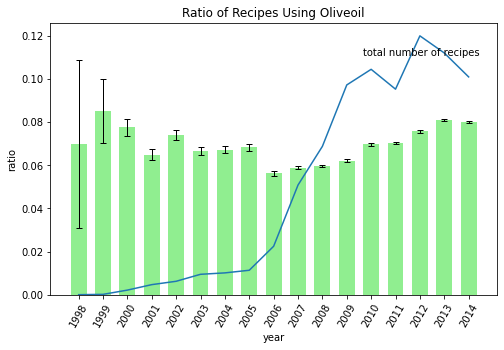

In [10]:
error_bar_set = dict(lw = 1, capthick = 1, capsize = 3)
fig = plt.figure(figsize=(8.0, 5.0))
ax = fig.add_subplot(1, 1, 1)
ax.plot(year, total_user_adjusted)
ax.bar(year, ratio, color="lightgreen",tick_label=year, yerr=se, ecolor="black", error_kw=error_bar_set, width=0.65)
ax.set_xticklabels(year, rotation=60)
ax.set_title("Ratio of Recipes Using Oliveoil")
ax.text(0.70, 0.88, "total number of recipes", size = 10, transform=ax.transAxes)
ax.set_xlabel("year")
ax.set_ylabel("ratio")
plt.savefig("mokomichi_2.png")

In [11]:
transition = []
for i in range(len(ratio)-1):
    transition.append(ratio[i+1]/ratio[i])

In [12]:
transition

[1.221590909090909,
 0.9116058177500743,
 0.8362257015972316,
 1.1371318278934834,
 0.9004727277889465,
 1.0101276783148403,
 1.0168020692591853,
 0.8233445366316943,
 1.0447892578334455,
 1.014626831265832,
 1.0425756246810913,
 1.120245631378797,
 1.0091917446655916,
 1.07676299387954,
 1.068923102863687,
 0.9895259153461206]

In [16]:
x_graph = [i+1999 for i in range(16)]

In [25]:
y_graph = [1 for i in range(len(x_graph))]

Text(0, 0.5, 'year-on-year rate')

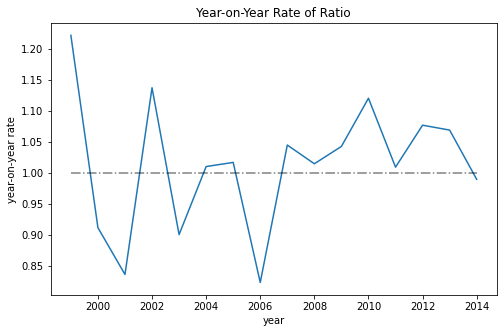

In [36]:
fig = plt.figure(figsize=(8.0, 5.0))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x_graph, transition)
ax.plot(x_graph, y_graph, color='000000', linestyle='-.', alpha=0.5)
ax.set_title("Year-on-Year Rate of Ratio")
ax.set_xlabel("year")
ax.set_ylabel("year-on-year rate")